In [2]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [3]:
import emcee
import sys
from astropy.table import Table
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import corner

default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] # get default colors

In [4]:
# read in list of simulation cosmo parameters
table = Table.read('cosmological_parameters.txt', format='ascii')
params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])

# PS5000 [2] vs. Peaks 2'[6]

(0, 9)

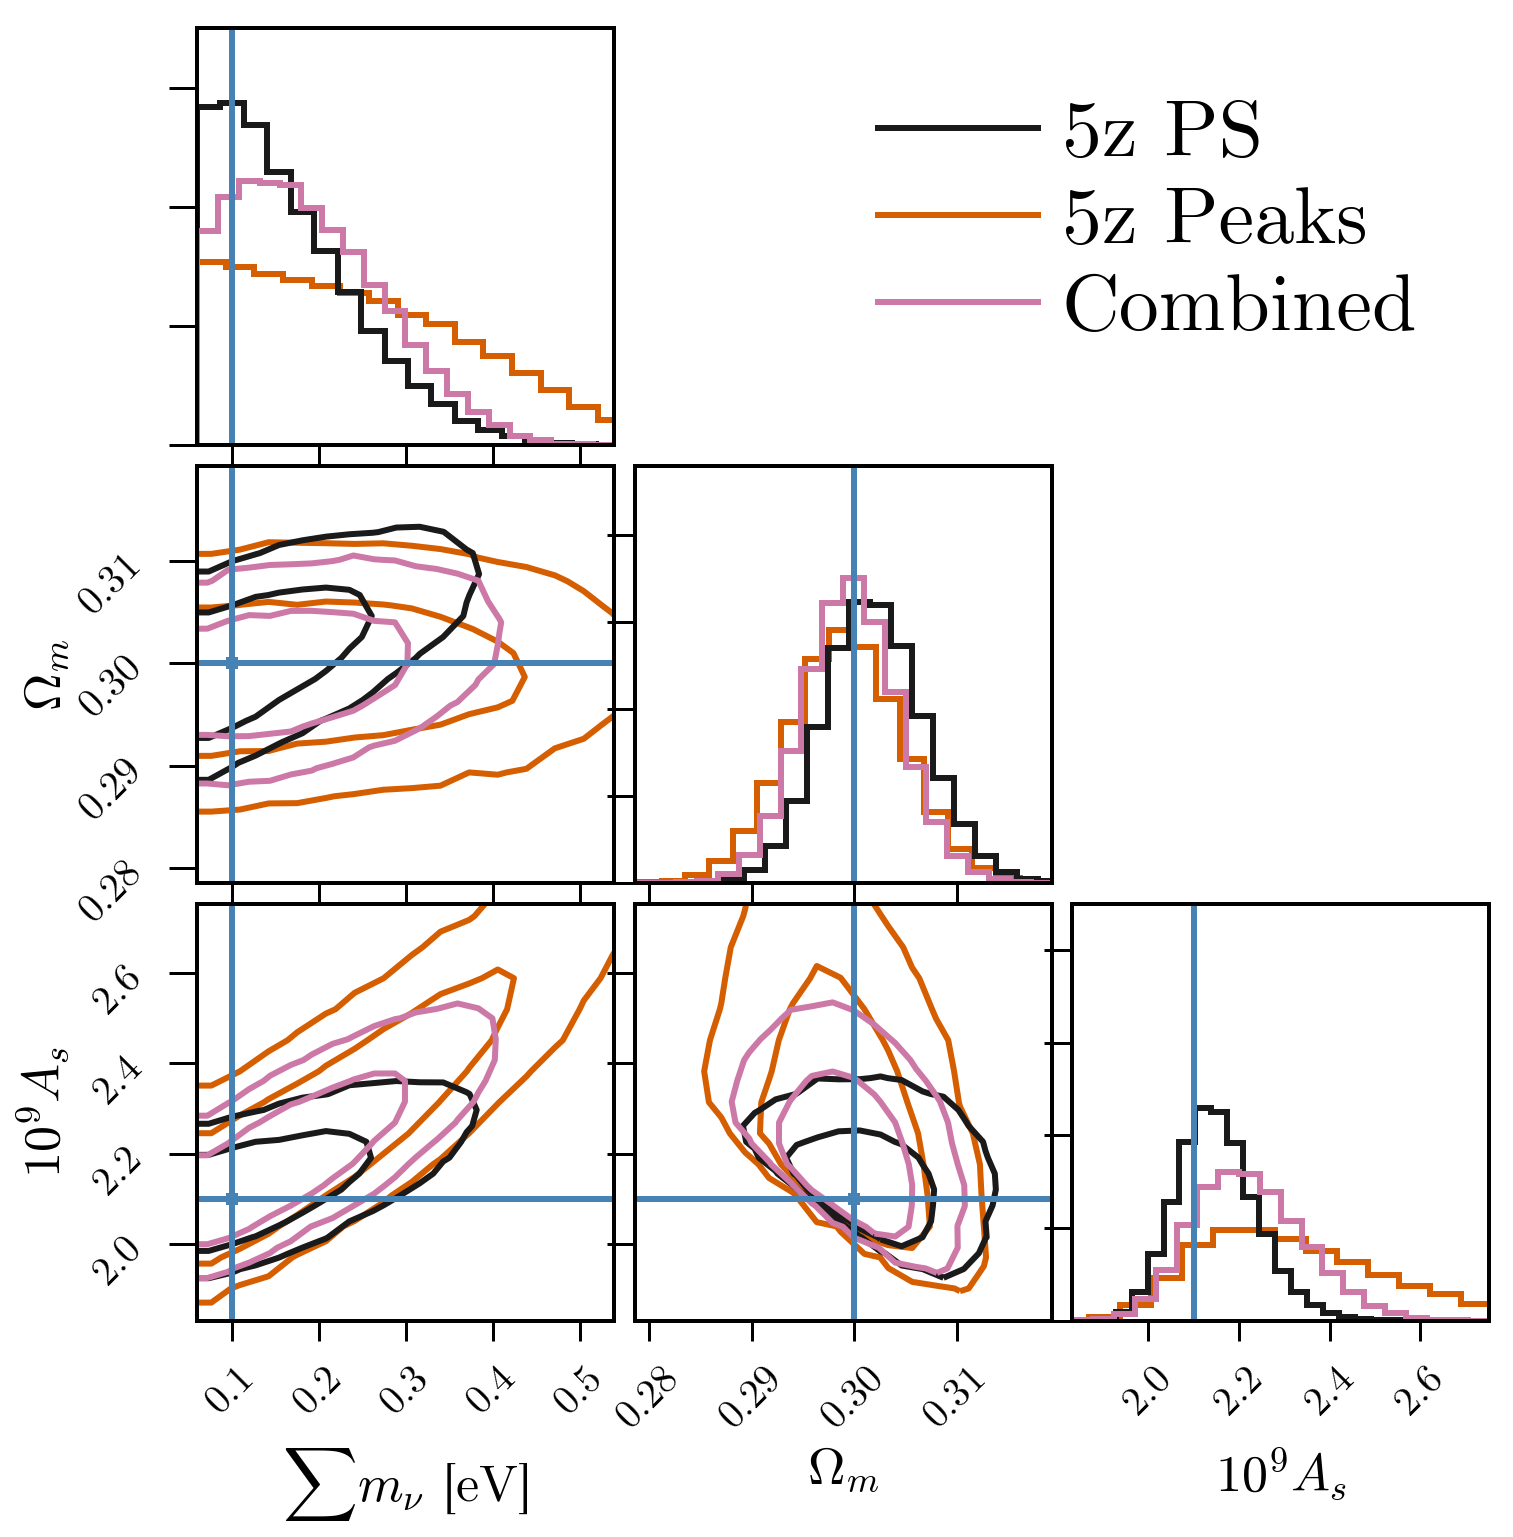

In [12]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])

chain = ascii.read("combo.out")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[4])


axes[0,2].plot([],[],color=default_color_list[0], label='5z PS')
axes[0,2].plot([],[],color=default_color_list[3], label='5z Peaks')
axes[0,2].plot([],[],color=default_color_list[4], label='Combined')
axes[0,2].legend(fontsize=40)

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# axes[2,0].set_xlabel(r'$\sum m_{\nu}$ (eV)', labelpad=50)
# axes[2,2].set_xlabel(r'$10^9 A_s$', labelpad=50)

# axes[1,0].set_ylabel(r'$\Omega_m$', labelpad=80)
# axes[2,0].set_ylabel(r'$10^9 A_s$', labelpad=50)

# fig.savefig('figures/5z_PS_peaks_compare.pdf')

# 3 Smoothing Scales [5,6,7]

(0, 9)

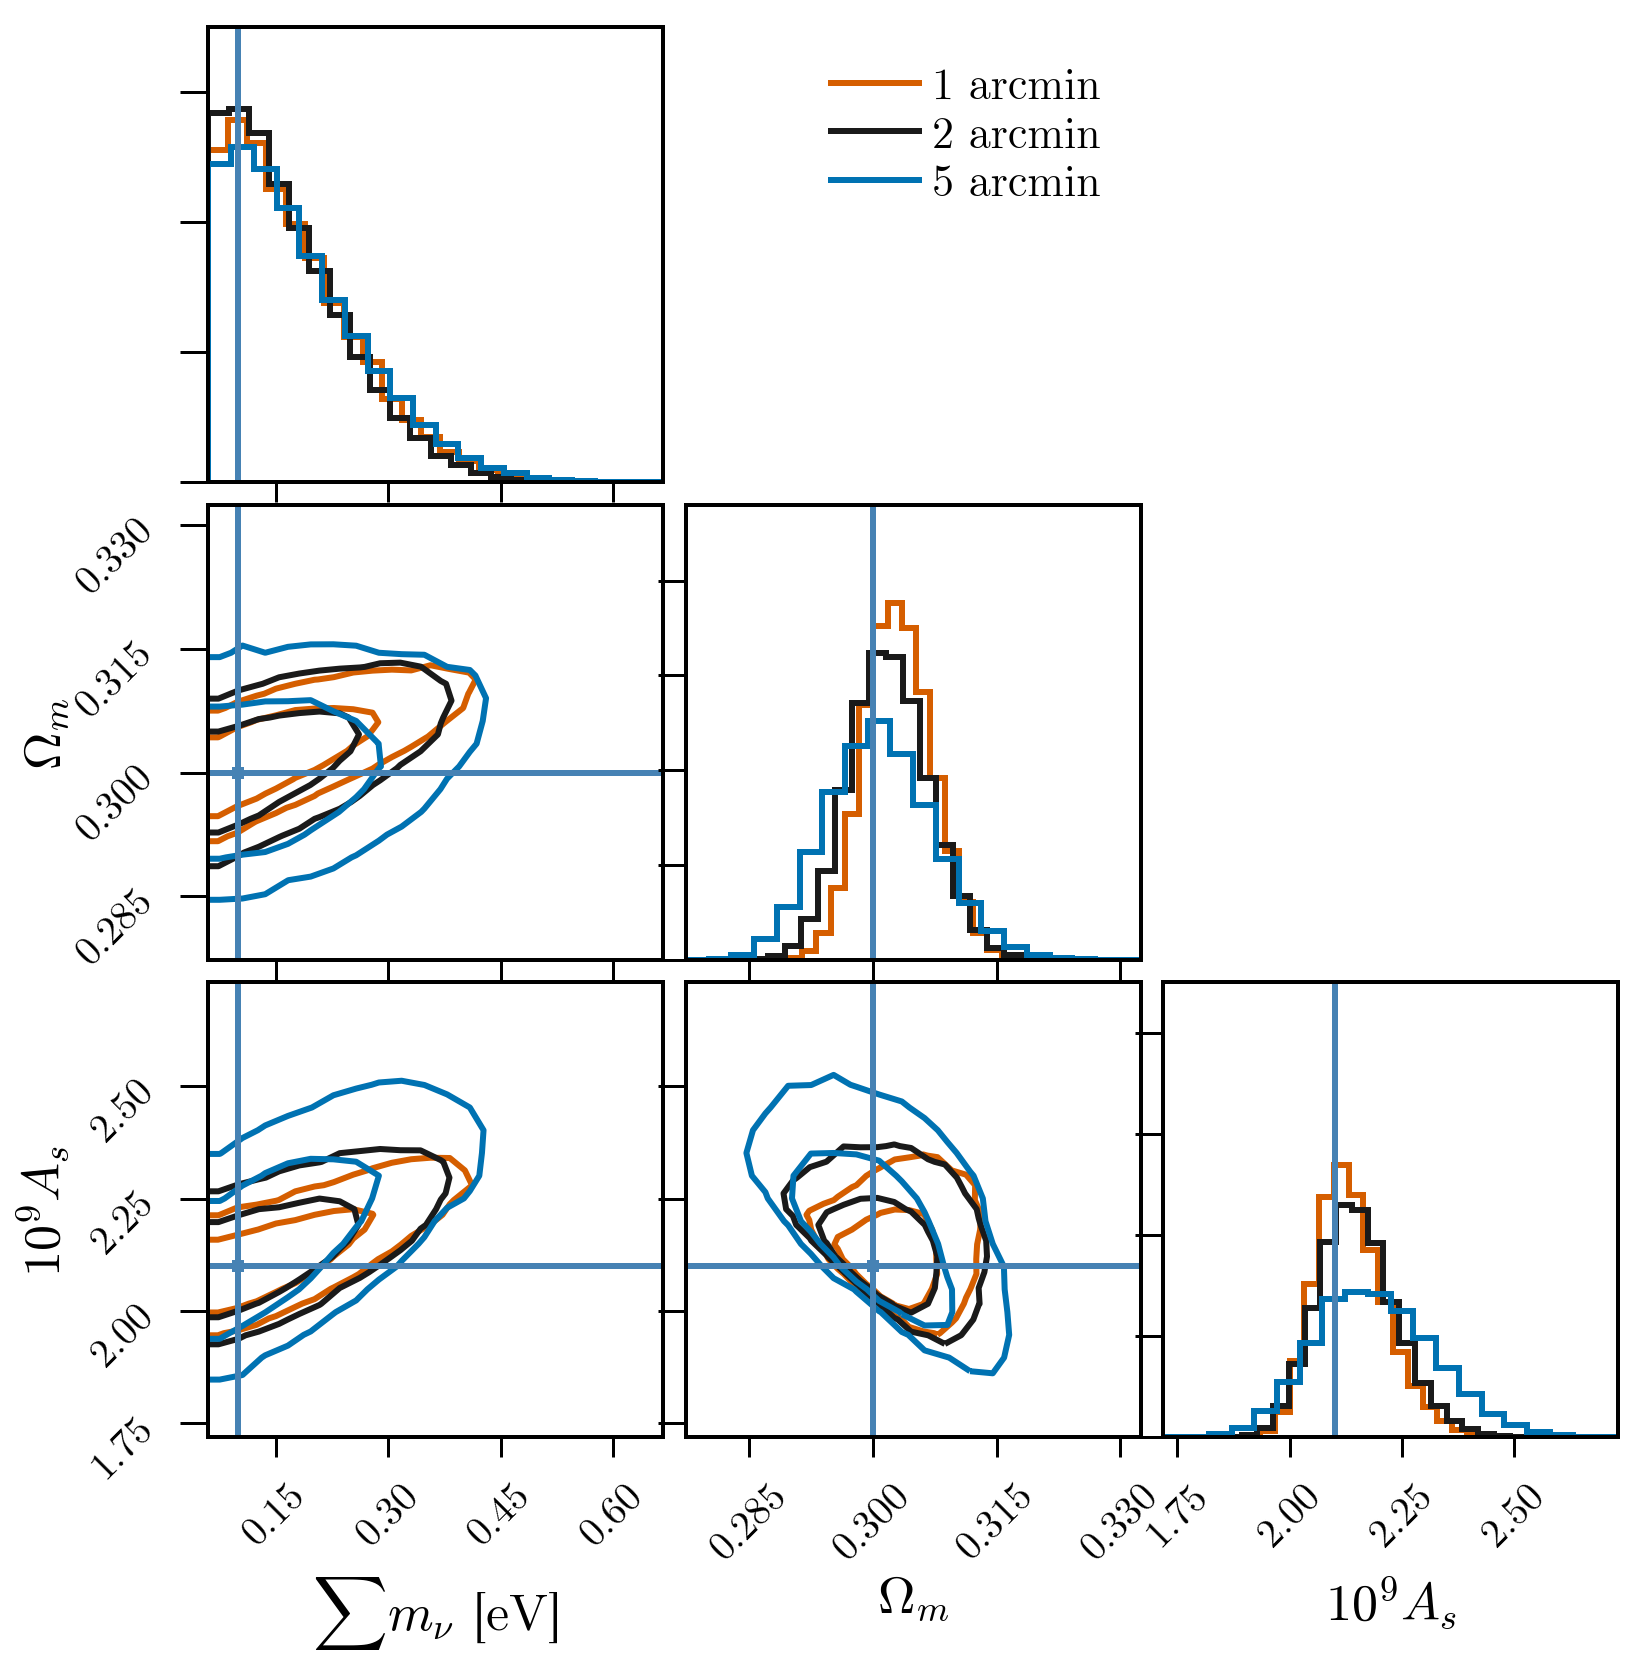

In [11]:
fig, axes = plt.subplots(3,3, figsize=(12,12))

chain = ascii.read("chains/Peaks_5_19020341.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])

chain = ascii.read("chains/Peaks_7_19020343.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])


axes[0,1].plot([],[],color=default_color_list[3], label='1 arcmin')
axes[0,1].plot([],[],color=default_color_list[0], label='2 arcmin')
axes[0,1].plot([],[],color=default_color_list[1], label='5 arcmin')

axes[0,1].legend()

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# Conjecture : some info at small scales

(0, 9)

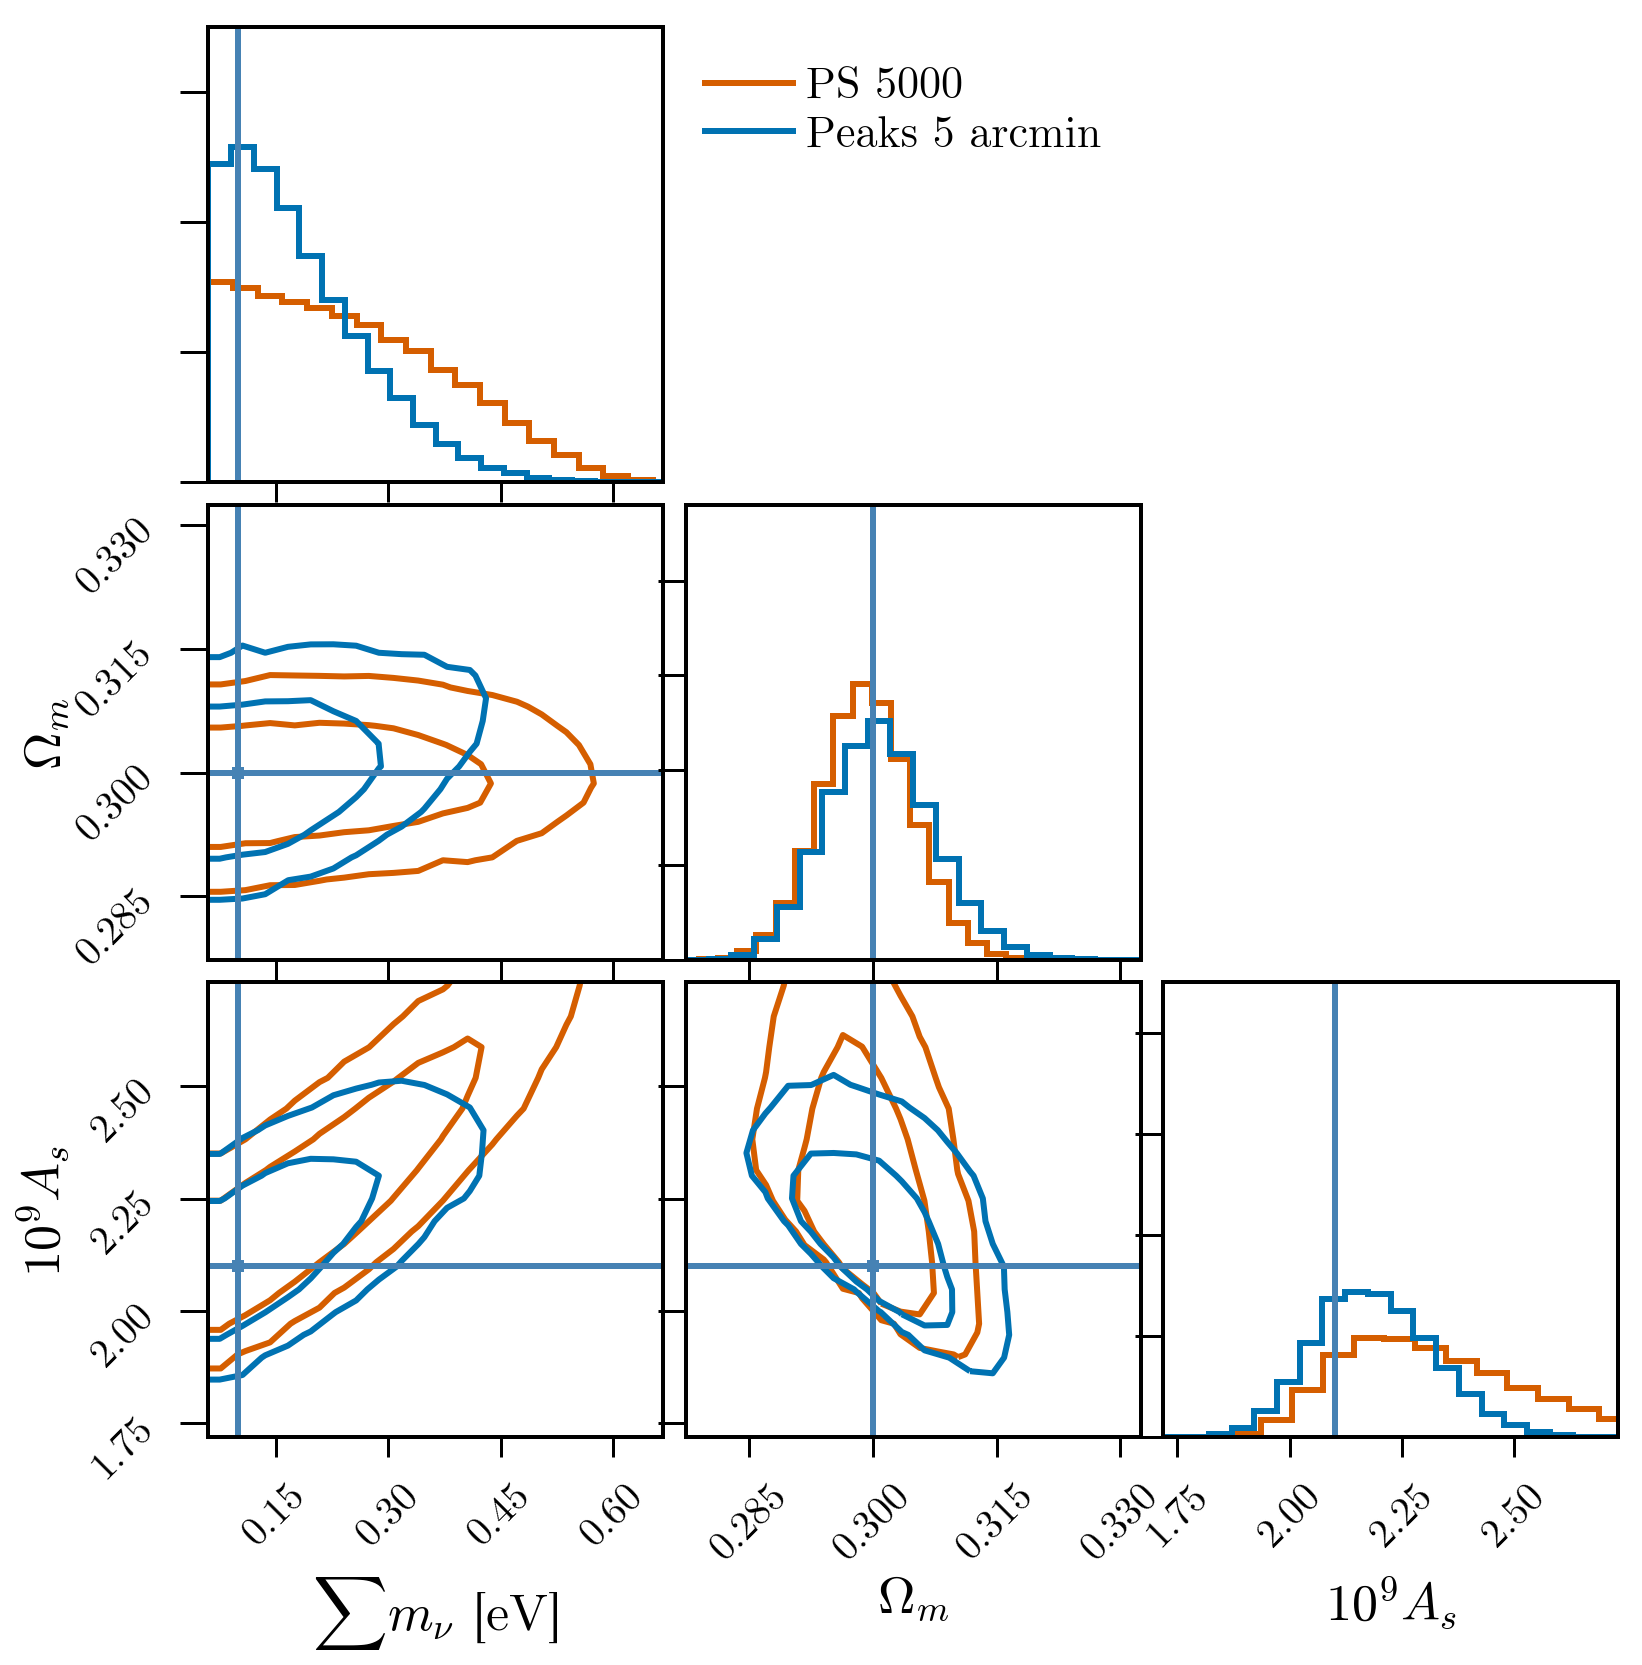

In [14]:
fig, axes = plt.subplots(3,3, figsize=(12,12))


chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/Peaks_7_19020343.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])


axes[0,1].plot([],[],color=default_color_list[3], label='PS 5000')
axes[0,1].plot([],[],color=default_color_list[1], label='Peaks 5 arcmin')

axes[0,1].legend()

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# Comparison of PS ngal40 and 5z

(0, 9)

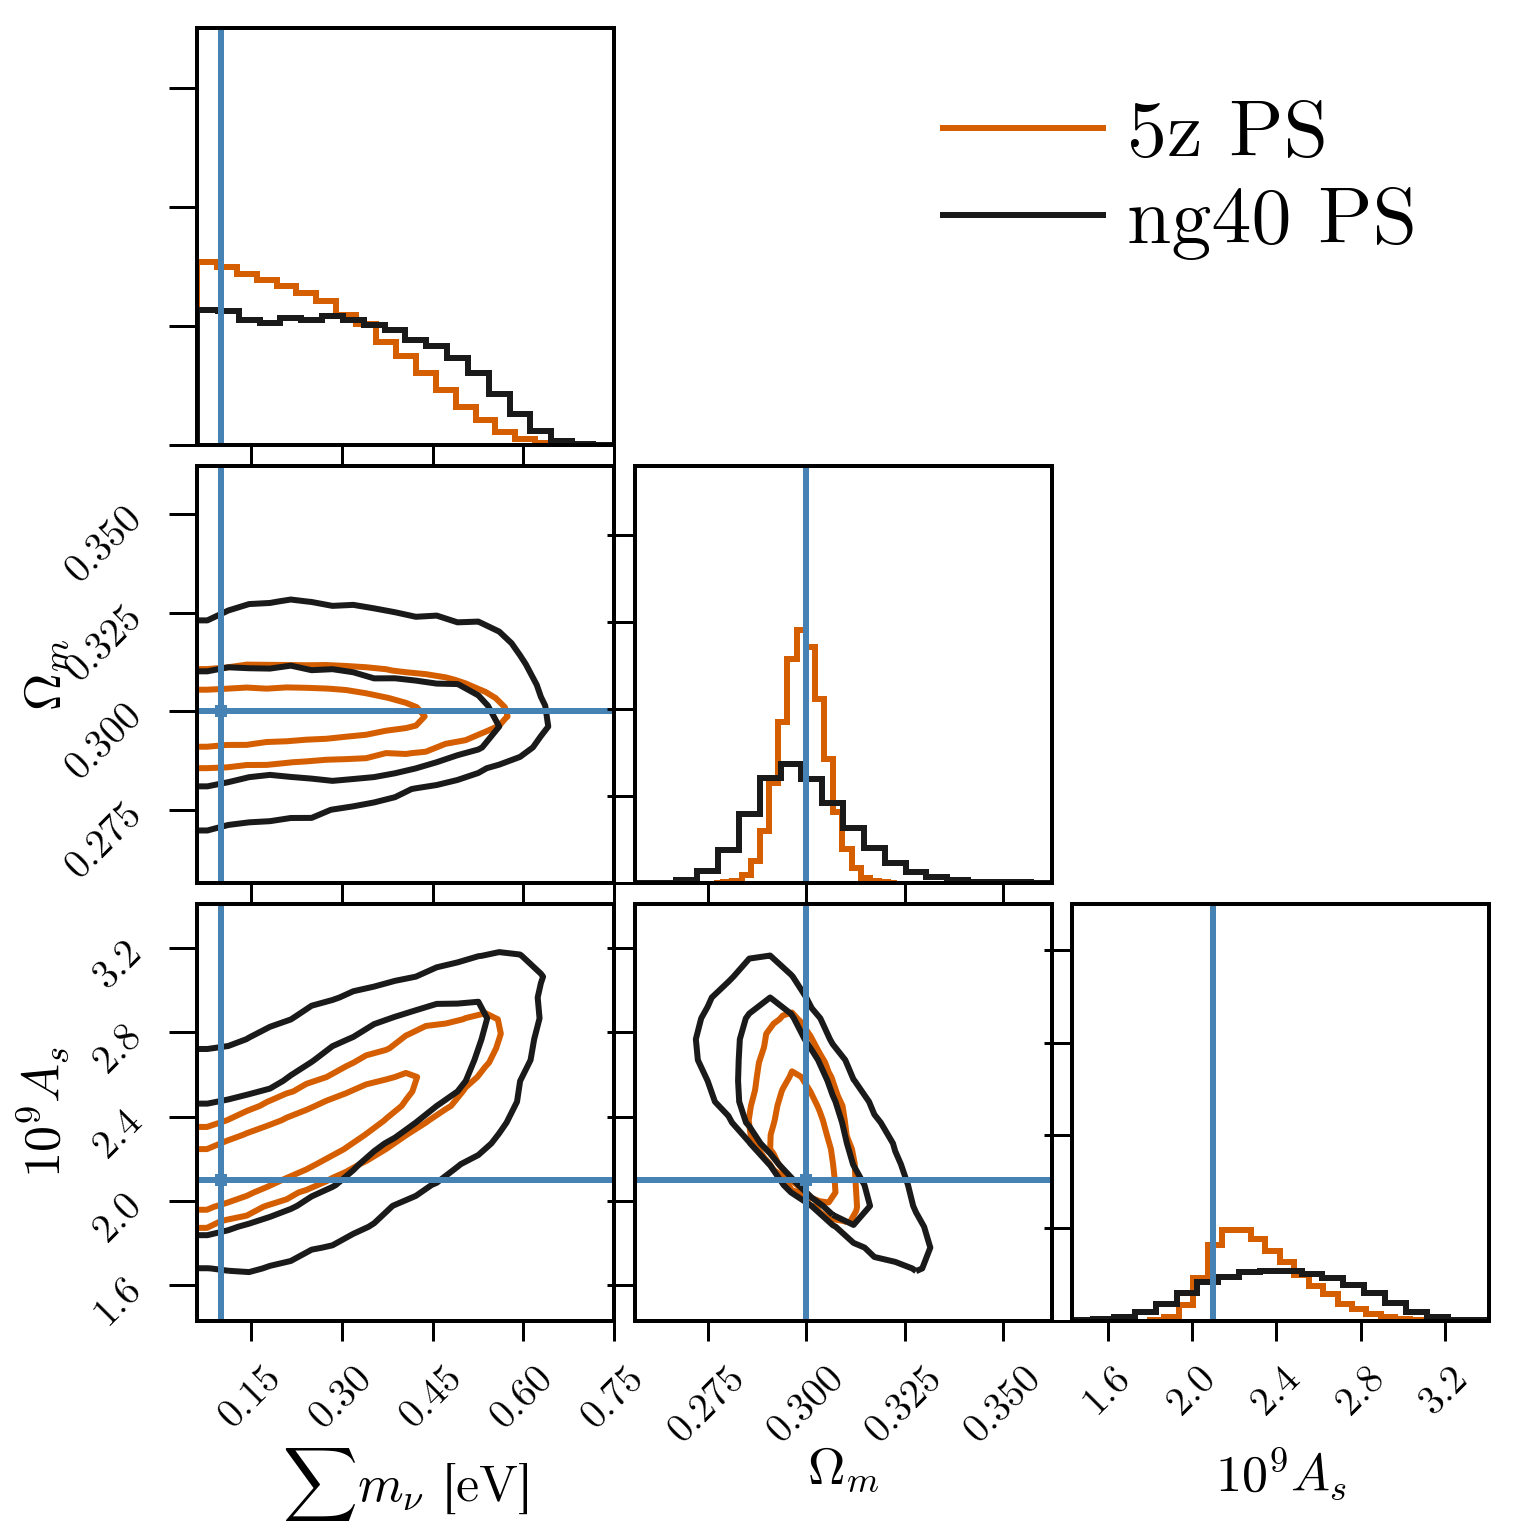

In [15]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/PS_4_19020349.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])


axes[0,2].plot([],[],color=default_color_list[3], label='5z PS')
axes[0,2].plot([],[],color=default_color_list[0], label='ng40 PS')
axes[0,2].legend(fontsize=40)

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# axes[2,0].set_xlabel(r'$\sum m_{\nu}$ (eV)', labelpad=50)
# axes[2,2].set_xlabel(r'$10^9 A_s$', labelpad=50)

# axes[1,0].set_ylabel(r'$\Omega_m$', labelpad=80)
# axes[2,0].set_ylabel(r'$10^9 A_s$', labelpad=50)

# fig.savefig('figures/5z_PS_peaks_compare.pdf')

# Peaks low / med / high

(0, 9)

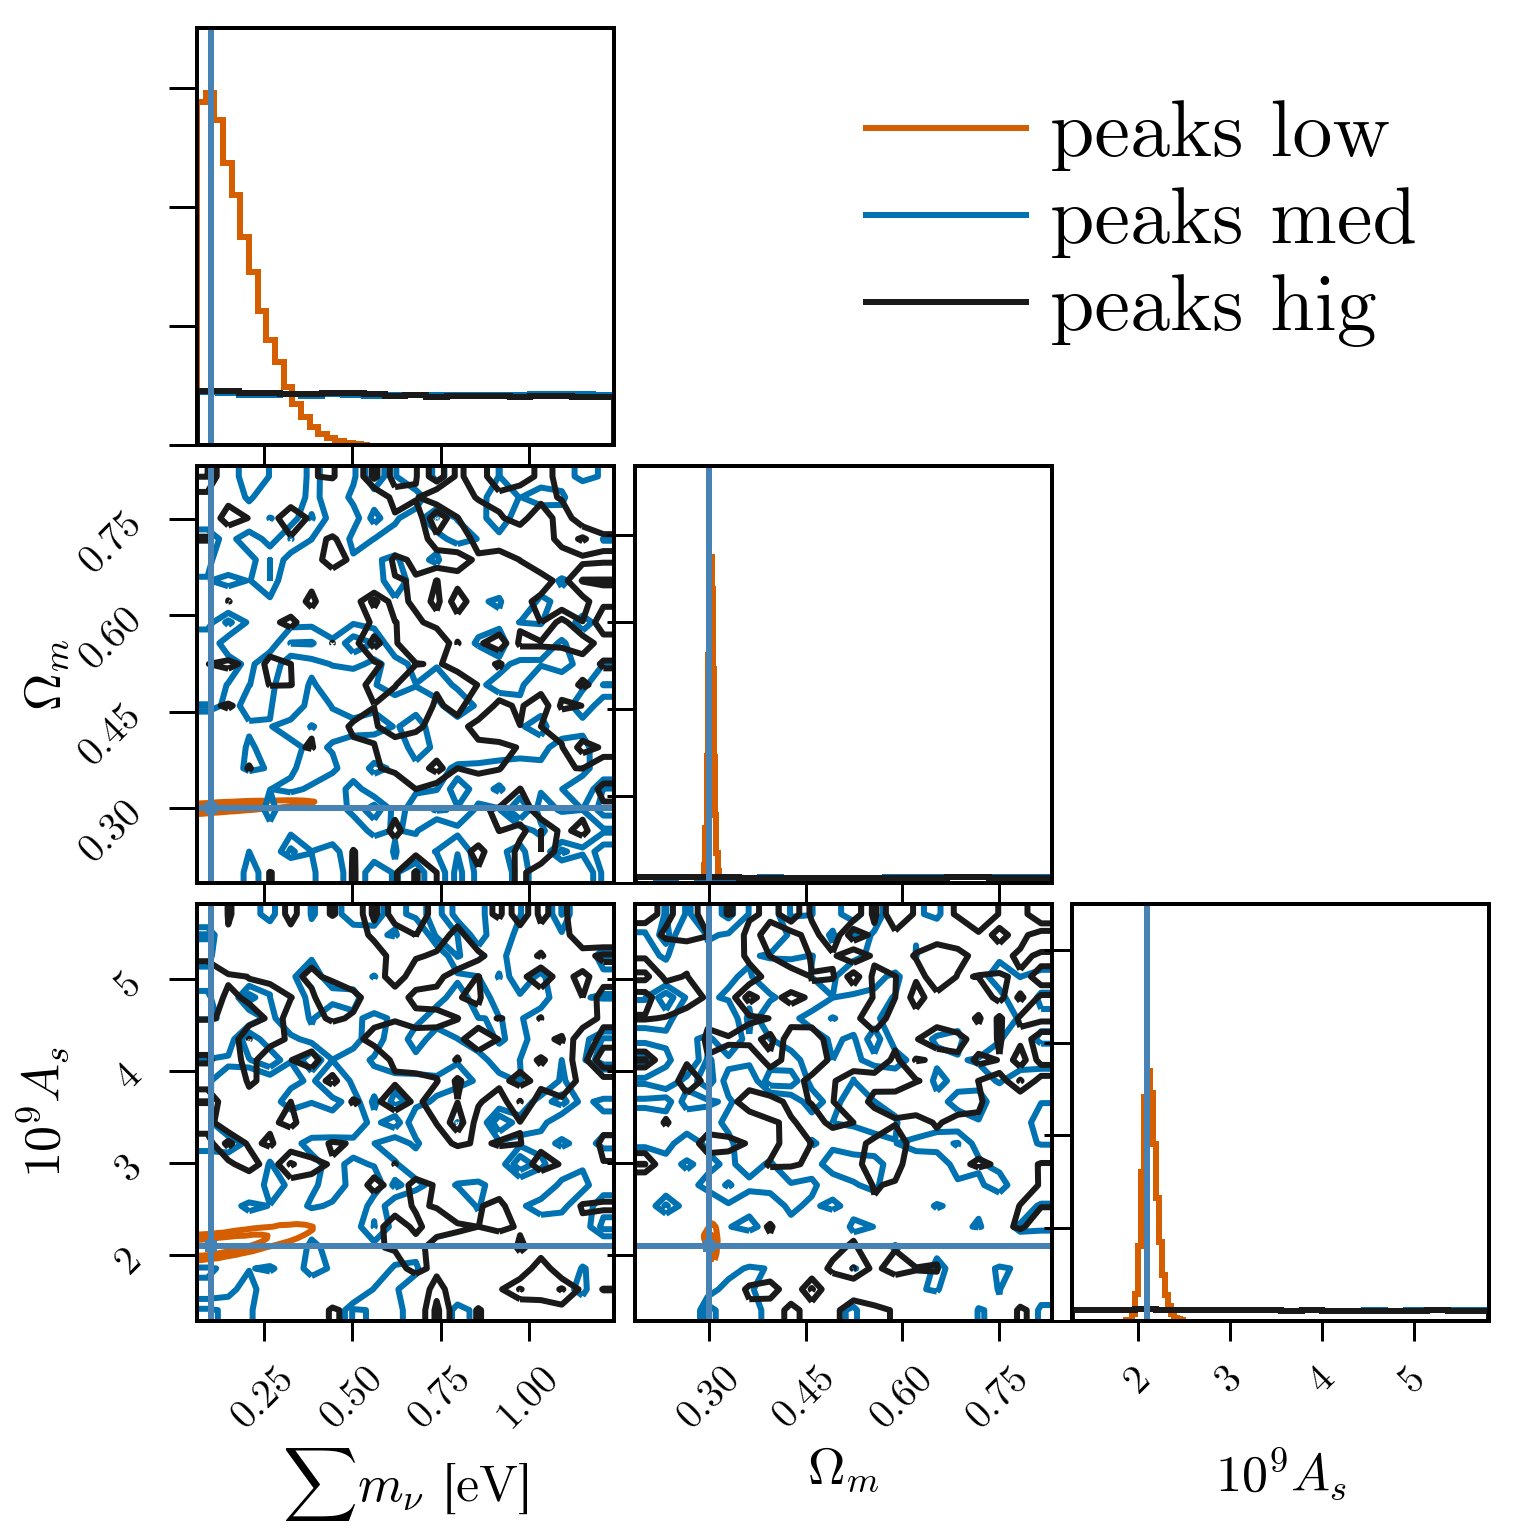

In [16]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/Peaks_8_low_19020344.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/Peaks_9_med_19020345.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])


chain = ascii.read("chains/Peaks_10_high_19020339.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])


axes[0,2].plot([],[],color=default_color_list[3], label='peaks low')
axes[0,2].plot([],[],color=default_color_list[1], label='peaks med')
axes[0,2].plot([],[],color=default_color_list[0], label='peaks hig')
axes[0,2].legend(fontsize=40)

axes[0,0].set_ylim(0,7)
axes[1,1].set_ylim(0,120)
axes[2,2].set_ylim(0,9)

# axes[2,0].set_xlabel(r'$\sum m_{\nu}$ (eV)', labelpad=50)
# axes[2,2].set_xlabel(r'$10^9 A_s$', labelpad=50)

# axes[1,0].set_ylabel(r'$\Omega_m$', labelpad=80)
# axes[2,0].set_ylabel(r'$10^9 A_s$', labelpad=50)

# fig.savefig('figures/5z_PS_peaks_compare.pdf')